In [8]:
#Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
fruit_info = pd.DataFrame(
    data={'fruit': ['apple', 'orange', 'banana', 'raspberry'],
          'color': ['red', 'orange', 'yellow', 'pink']
          })
fruit_info

fruit_info['rank1'] = [1,2,3,4]
fruit_info

,fruit,color,rank1
0,apple,red,1
1,orange,orange,2
2,banana,yellow,3
3,raspberry,pink,4


In [10]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info["rank1"].dtype == ('int64')
assert len(fruit_info["rank1"].dropna()) == 4
### END SOLUTION

In [11]:
fruit_info.loc[:, 'rank2'] = [4,3,2,1]
fruit_info

,fruit,color,rank1,rank2
0,apple,red,1,4
1,orange,orange,2,3
2,banana,yellow,3,2
3,raspberry,pink,4,1


In [12]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info["rank2"].dtype == ('int64')
assert len(fruit_info["rank2"].dropna()) == 4
### END SOLUTION

In [13]:
fruit_info_original = fruit_info.drop(['rank1' , 'rank2'], axis=1)

In [14]:
fruit_info_original

,fruit,color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [15]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info_original.shape[1] == 2
### END SOLUTION

In [16]:
fruit_info_original.rename(columns={"fruit" : "Fruit", "color" : "Color"}, inplace=True)
fruit_info_original

,Fruit,Color
0,apple,red
1,orange,orange
2,banana,yellow
3,raspberry,pink


In [17]:
### BEGIN SOLUTION
# complete the assert statements below
assert fruit_info_original.columns[0] == 'Fruit'
assert fruit_info_original.columns[1] == 'Color'
### END SOLUTION

In [18]:
# Author: Berkeley Data Science Group
def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path object representing the file.
    """
    import requests
    from pathlib import Path
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        birth_time = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded:", birth_time)
    return file_path


In [19]:


data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
# use fetct_and_cache to avoid multiple downloads.
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')



Using cached version downloaded: Tue Sep 17 11:28:39 2019


In [20]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

field_names = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=field_names)

# List comprehension
states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = pd.concat(states).reset_index(drop=True)

In [21]:
# print key information about this data frame
baby_names.head()
len(baby_names)

6028151

In [22]:
# find the number of records in the file
assert(len(baby_names) == 6028151)

In [23]:
baby_names.loc[2:5,'Name']


2        Anna
3    Margaret
4       Helen
5       Elsie
Name: Name, dtype: object

In [24]:
Name_column = baby_names.loc[2:5,['Name']]
print(Name_column)

       Name
2      Anna
3  Margaret
4     Helen
5     Elsie


In [25]:
baby_names.iloc[1:4,3]

1       Annie
2        Anna
3    Margaret
Name: Name, dtype: object

In [26]:
df = baby_names[:5].set_index("Name") 
df

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Annie,AK,F,1910,12
Anna,AK,F,1910,10
Margaret,AK,F,1910,8
Helen,AK,F,1910,7


In [27]:
df.loc[['Mary', 'Anna'], :]

,State,Sex,Year,Count
Name,,,,
Mary,AK,F,1910,14
Anna,AK,F,1910,10


In [28]:
# Example: 
# df.loc[2:5,"Year"] You can't do this
df.iloc[1:4,2:3]

,Year
Name,
Annie,1910
Anna,1910
Margaret,1910


In [29]:
### BEGIN SOLUTION
name_and_year = baby_names.iloc[:,[3,2]]
### END SOLUTION
name_and_year

,Name,Year
0,Mary,1910
1,Annie,1910
2,Anna,1910
3,Margaret,1910
4,Helen,1910
5,Elsie,1910
6,Lucy,1910
7,Dorothy,1910
8,Mary,1911
9,Margaret,1911


In [30]:
name_and_year.shape

(6028151, 2)

In [31]:
### BEGIN SOLUTION
# complete the assert statements below
assert name_and_year.shape == (6028151, 2)
assert name_and_year.loc[0,"Name"] == 'Mary'
assert name_and_year.loc[0,"Year"] == 1910
### END SOLUTION

In [32]:
### BEGIN SOLUTION
# construct a DataFrame containing only the names registered in NJ. 
# The table below shows the expected answer.
nj = baby_names.loc[baby_names['State']== 'NJ']
nj
### END SOLUTION

,State,Sex,Year,Name,Count
3556694,NJ,F,1910,Mary,593
3556695,NJ,F,1910,Helen,438
3556696,NJ,F,1910,Anna,355
3556697,NJ,F,1910,Margaret,311
3556698,NJ,F,1910,Elizabeth,260
3556699,NJ,F,1910,Dorothy,255
3556700,NJ,F,1910,Rose,201
3556701,NJ,F,1910,Ruth,188
3556702,NJ,F,1910,Mildred,174
3556703,NJ,F,1910,Florence,169


In [33]:
### BEGIN SOLUTION
result = baby_names.loc[(baby_names['Year']==2000) & 
                        (baby_names['Count'] > 3000)]
### END SOLUTION

In [34]:
result

,State,Sex,Year,Name,Count
706923,CA,M,2000,Daniel,4341
706924,CA,M,2000,Anthony,3838
706925,CA,M,2000,Jose,3803
706926,CA,M,2000,Andrew,3600
706927,CA,M,2000,Michael,3572
706928,CA,M,2000,Jacob,3520
706929,CA,M,2000,Joshua,3356
706930,CA,M,2000,Christopher,3336
706931,CA,M,2000,David,3280
706932,CA,M,2000,Matthew,3254


In [35]:
### BEGIN SOLUTION
# complete the assert statements below
assert len(result) == 11
assert result["Count"].sum() == 38997
assert result["Count"].iloc[0] == 4341
### END SOLUTION

In [36]:
### BEGIN SOLUTION
num_of_names_per_year=nj['Year'].value_counts()

###

In [37]:
num_of_names_per_year[:5]

2007    2567
2008    2536
2009    2530
2014    2510
2018    2495
Name: Year, dtype: int64

In [38]:
### BEGIN SOLUTION
# complete the assert statements below
assert num_of_names_per_year[2007] == 2567
assert num_of_names_per_year[:5].sum() == 12638
assert num_of_names_per_year[1910] == 348
assert num_of_names_per_year[:15].sum() == 37286
### END SOLUTION

In [39]:
### BEGIN SOLUTION
num_of_names_per_gender = nj['Sex'].value_counts()
### END SOLUTION

In [40]:
num_of_names_per_gender

F    86430
M    65690
Name: Sex, dtype: int64

In [41]:
### BEGIN SOLUTION
# fix the errors in these assertions
assert num_of_names_per_gender["F"] > num_of_names_per_gender["M"]
assert num_of_names_per_gender["F"] == 86430
assert num_of_names_per_gender["M"] == 65690
### END SOLUTION

In [42]:
count_for_names = nj.groupby('Name')['Count'].sum()
count_for_names

Name
Aaden         65
Aadhav        11
Aadhya       175
Aadi         104
Aadit          6
Aaditya       36
Aadvik        21
Aadya         98
Aahan         11
Aahana        35
Aahil          6
Aakash        64
Aalia          6
Aaliyah     1932
Aamir         65
Aamira         5
Aanika         5
Aanvi         23
Aanya        301
Aaradhya      46
Aarav        636
Aaria         15
Aarin          5
Aariv          5
Aariz          5
Aarna        174
Aarnav        19
Aarohi        54
Aaron       9996
Aarti          5
            ... 
Ziyad          5
Ziyon         20
Zlata          7
Zoe         2998
Zoey        1270
Zofia         37
Zoha          15
Zoie          33
Zoila         10
Zola          11
Zoltan        23
Zora          31
Zoraida      106
Zoya          95
Zulay          9
Zuleika       35
Zuleyka       34
Zulma         13
Zuri         241
Zuriel         6
Zuzanna       30
Zvi            5
Zyair         37
Zyaire       107
Zyana          7
Zyasia        25
Zyion         32
Zyla     

In [43]:
count_for_names.sort_values(ascending=False)[:5]

Name
John       197477
Robert     171976
Michael    168496
Joseph     136175
William    132525
Name: Count, dtype: int64

In [44]:
assert count_for_names["Michael"] == 168496
assert count_for_names[:100].sum() == 46341
assert count_for_names["David"] == 97901
assert count_for_names[:1000].sum() == 826093
### END SOLUTION

In [65]:
### BEGIN SOLUTION
female_name_count = nj[(baby_names['Sex'] =='F') & (baby_names['Year'] > 1999)].groupby('Name')['Count'].sum()
### END SOLUTION

C:\Users\Jarlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [238]:
female_name_count.sort_values(ascending=False)[:5]

Name
Isabella    10591
Emily       10484
Olivia       9904
Sophia       9150
Emma         8857
Name: Count, dtype: int64

In [239]:
### BEGIN SOLUTION
# fix the assertion errors
assert female_name_count["Emily"] == 10484
assert female_name_count[:100].sum() == 19439
assert female_name_count["Isabella"] == 10591
assert female_name_count[:10000].sum() == 737772
### END SOLUTION

In [240]:
### BEGIN SOLUTION
def most_popular(year,state):
    top_names = {}
    st = baby_names.loc[baby_names['State']== state]
    male_name = st[(baby_names['Year'] == year) & (baby_names['Sex']=='M')].groupby('Name')['Count'].sum()
    female_name = st[(baby_names['Year'] == year) & (baby_names['Sex']=='F')].groupby('Name')['Count'].sum()
    Sorted_mn = male_name.sort_values(ascending=False)[:1]
    top_names.update(Sorted_mn)
    Sorted_fn = female_name.sort_values(ascending=False)[:1]
    top_names.update(Sorted_fn)
    return [*top_names]
### END SOLUTION

In [241]:
year = 2000
state = 'NJ'
most_popular(year, state)

C:\Users\Jarlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\Jarlin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


['Michael', 'Emily']

In [245]:
top_names = []
for s in baby_names.loc[s, 'State']:
    for y in baby_names.loc[y, 'Year']:
         #top_names = most_popular(s,y)

SyntaxError: unexpected EOF while parsing (<ipython-input-245-5df6ad05be41>, line 4)

In [264]:
"""states_list = []
years_list = []
for s in baby_names['State']:
    if s not in states_list:
        states_list.append(s)
for y in baby_names['Year']:
    if y not in years_list:
        years_list.append(y)
        
#print(states_list)
#print(years_list)

for year in years_list:
    for state in states_list:
        most_popular(year,state)
        """

"states_list = []\nyears_list = []\nfor s in baby_names['State']:\n    if s not in states_list:\n        states_list.append(s)\nfor y in baby_names['Year']:\n    if y not in years_list:\n        years_list.append(y)\n        \n#print(states_list)\n#print(years_list)\n\nfor year in years_list:\n    for state in states_list:\n        most_popular(year,state)\n        "

In [263]:
mylist= {}
Fcount_list = baby_names[(baby_names['Sex']=='F')].groupby('Name')['Count'].sum()
Fcount_list.sort_values(ascending=False)[:1]
mylist.update(Fcount_list.sort_values(ascending=False)[:1])
Mcount_list = baby_names[(baby_names['Sex']=='M')].groupby('Name')['Count'].sum()
Mcount_list.sort_values(ascending=False)[:1]
mylist.update(Mcount_list.sort_values(ascending=False)[:1])
print([*mylist])

['Mary', 'James']


In [266]:
baby_names

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7
5,AK,F,1910,Elsie,6
6,AK,F,1910,Lucy,6
7,AK,F,1910,Dorothy,5
8,AK,F,1911,Mary,12
9,AK,F,1911,Margaret,7


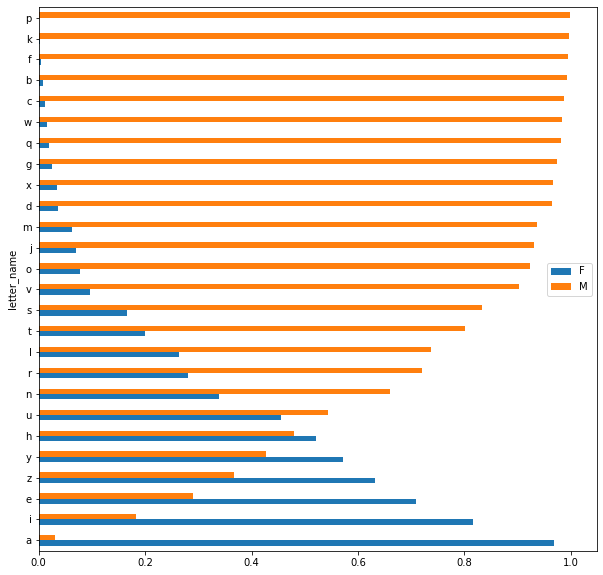

In [303]:
#Letter_name = baby_names['Name'].str[-1].head()
#Letter_name

#Making a new column to the data frame containing the last letter
baby_names['Letter_name'] = baby_names['Name'].str[-1]
letter_name_count = (baby_names.loc[:, ('Sex','Count', 'Letter_name')].groupby(['Letter_name', 'Sex']).sum())
lnc_pivot = baby_names.pivot_table( index='letter_name', 
                                   columns='Sex', 
                                   values='Count', aggfunc=sum)
mylist = lnc_pivot['F'] + lnc_pivot['M']

final_chart = pd.DataFrame({'F': lnc_pivot['F'] / mylist, 'M': lnc_pivot['M'] / mylist}).sort_values('M')
final_chart.plot.barh(figsize=(10,10));

In [306]:
""""
index =  ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
df = pd.baby_names({'Name': Name, 'Sex':sex}, index=index)
ax = df.plot.barh()
"""


'"\nindex =  [\'a\',\'b\',\'c\',\'d\',\'e\',\'f\',\'g\',\'h\',\'i\',\'j\',\'k\',\'l\',\'m\',\'n\',\'o\',\'p\',\'q\',\'r\',\'s\',\'t\',\'u\',\'v\',\'w\',\'x\',\'y\',\'z\']\ndf = pd.baby_names({\'Name\': Name, \'Sex\':sex}, index=index)\nax = df.plot.barh()\n'

In [386]:
movies = pd.read_csv("movies.csv")
movies

,director,genre,movie,rating,revenue
0,David,Action & Adventure,Deadpool 2,7,318344544
1,Bill,Comedy,Book Club,5,68566296
2,Ron,Science Fiction & Fantasy,Solo: A Star Wars Story,6,213476293
3,Baltasar,Drama,Adrift,6,31445012
4,Bart,Drama,American Animals,6,2847319
5,Gary,Action & Adventure,Oceans 8,6,138803463
6,Drew,Action & Adventure,Hotel Artemis,8,6708147
7,Brad,Animation,Incredibles 2,5,594398019
8,Jeff,Comedy,Tag,6,54336863
9,J.A.,Science Fiction & Fantasy,Jurassic World: Fallen Kingdom,6,411873505


In [328]:
### BEGIN SOLUTION
num_groups = 6
genre_list = movies.groupby('genre').groups
### END SOLUTION
genre_list

{'Action & Adventure': Int64Index([0, 5, 6, 12, 14, 16], dtype='int64'),
 'Animation': Int64Index([7, 13], dtype='int64'),
 'Comedy': Int64Index([1, 8, 10, 15, 17], dtype='int64'),
 'Drama': Int64Index([3, 4], dtype='int64'),
 'Horror': Int64Index([11], dtype='int64'),
 'Science Fiction & Fantasy': Int64Index([2, 9], dtype='int64')}

In [329]:
assert num_groups == 6
assert set(genre_list) == set(['Action & Adventure', 'Comedy', 'Science Fiction & Fantasy', 'Drama', 'Animation', 'Horror'])

In [381]:
### BEGIN SOLUTION
agg_cols = movies.groupby('genre').agg({'rating': np.mean , 'revenue': np.mean})
### END SOLUTIO

In [382]:
assert set(agg_cols) == set(['rating', 'revenue'])

In [383]:
agg_cols

,rating,revenue
genre,,
Action & Adventure,6.333333,153569934.5
Animation,5.000000,374408165.0
Comedy,6.000000,56719237.4
Drama,6.000000,17146165.5
Horror,7.000000,68765655.0
Science Fiction & Fantasy,6.000000,312674899.0


In [392]:
pd.pivot_table(data=movies, index='genre', columns='rating', 
               values='revenue', aggfunc=np.mean)


### BEGIN SOLUTION
answer = 1
### END SOLUTION



rating,5,6,7,8
genre,,,,
Action & Adventure,208681866.0,129228350.0,318344544.0,6708147.0
Animation,374408165.0,NaN,NaN,NaN
Comedy,55383976.0,30561590.0,NaN,111705055.0
Drama,NaN,17146165.5,NaN,NaN
Horror,NaN,NaN,68765655.0,NaN
Science Fiction & Fantasy,NaN,312674899.0,NaN,NaN


In [530]:
s = baby_names.groupby('Name')['Count'].sum()
mylist = []
#mylist = pd.Series(mylist)
#mylist = pd.DataFrame(list(mylist))


merged_df = pd.merge(movies, s, left_on=['director'], right_on=['Name'])    

merged_df

#df1.drop_duplicates().dropna().reset_index()
#df1 = df1.drop('Index', 1)

,director,genre,movie,rating,revenue,Count
0,David,Action & Adventure,Deadpool 2,7,318344544,3605910
1,Bill,Comedy,Book Club,5,68566296,154317
2,Ron,Science Fiction & Fantasy,Solo: A Star Wars Story,6,213476293,32758
3,Baltasar,Drama,Adrift,6,31445012,10
4,Bart,Drama,American Animals,6,2847319,12769
5,Gary,Action & Adventure,Oceans 8,6,138803463,898821
6,Drew,Action & Adventure,Hotel Artemis,8,6708147,76048
7,Brad,Animation,Incredibles 2,5,594398019,80125
8,Jeff,Comedy,Tag,6,54336863,114553
9,Charles,Comedy,Uncle Drew,5,42201656,2280600


In [531]:
### BEGIN SOLUTION
# complete the assertions
assert merged_df.loc[0, 'Count'] == 3605910
assert merged_df.loc[3, 'Count'] == 10 
assert merged_df.loc[7, 'Count'] == 80125
assert merged_df['Count'].sum() == 9595914
assert len(merged_df) == 14
### END SOLUTION

In [529]:
### BEGIN SOLUTION
answer = 4
### END SOLUTION